In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
tf.random.set_seed(10)

In [3]:
training_data = pd.read_csv('train.csv'
)

In [4]:
training_data.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Condition2', 'RoofMatl', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature', 'HouseStyle'], inplace=True)
training_data = pd.get_dummies(training_data)
training_data.fillna(int(training_data["LotFrontage"].mean()), inplace=True)
training_data["TotalSF"] = training_data["1stFlrSF"] + training_data["2ndFlrSF"] + training_data["TotalBsmtSF"]
training_data.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)
unique_ms_subclass = list(pd.unique(training_data["MSSubClass"]))
for i in range(len(training_data)):
    training_data["MSSubClass"][i] = unique_ms_subclass.index(training_data["MSSubClass"][i])

C:\Users\arezz\AppData\Local\Temp\ipykernel_23084\3903730083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["MSSubClass"][i] = unique_ms_subclass.index(training_data["MSSubClass"][i])


In [5]:
X = training_data.drop(columns=['SalePrice', 'Id']).to_numpy()
Y = training_data["SalePrice"].to_numpy()

In [6]:
scaler = MinMaxScaler((0,1))
x_scaled = scaler.fit_transform(X)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.25, random_state=22)

In [8]:
input_layer = tf.keras.Input(shape=x_train[0].shape)
layer = tf.keras.layers.Dense(204, activation='relu')(input_layer)
layer = tf.keras.layers.Dense(102, activation='relu')(layer)
layer = tf.keras.layers.Dense(32, activation='relu')(layer)
layer = tf.keras.layers.Dense(16, activation='relu')(layer)
out = tf.keras.layers.Dense(1, activation='linear')(layer)
model = tf.keras.Model(inputs=input_layer, outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 204)]             0         
                                                                 
 dense (Dense)               (None, 204)               41820     
                                                                 
 dense_1 (Dense)             (None, 102)               20910     
                                                                 
 dense_2 (Dense)             (None, 32)                3296      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 66,571
Trainable params: 66,571
Non-trainable p

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=750, validation_data=(x_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)])

Epoch 1/750
18/18 [==============================] - 1s 11ms/step - loss: 179849.8125 - mean_absolute_error: 179849.8125 - val_loss: 184111.7344 - val_mean_absolute_error: 184111.7344
Epoch 2/750
18/18 [==============================] - 0s 3ms/step - loss: 179811.1875 - mean_absolute_error: 179811.1875 - val_loss: 184013.2344 - val_mean_absolute_error: 184013.2344
Epoch 3/750
18/18 [==============================] - 0s 3ms/step - loss: 179578.0156 - mean_absolute_error: 179578.0156 - val_loss: 183507.8125 - val_mean_absolute_error: 183507.8125
Epoch 4/750
18/18 [==============================] - 0s 3ms/step - loss: 178584.7500 - mean_absolute_error: 178584.7500 - val_loss: 181624.4219 - val_mean_absolute_error: 181624.4219
Epoch 5/750
18/18 [==============================] - 0s 3ms/step - loss: 175335.1719 - mean_absolute_error: 175335.1719 - val_loss: 176048.1719 - val_mean_absolute_error: 176048.1719
Epoch 6/750
18/18 [==============================] - 0s 3ms/step - loss: 166563.5000

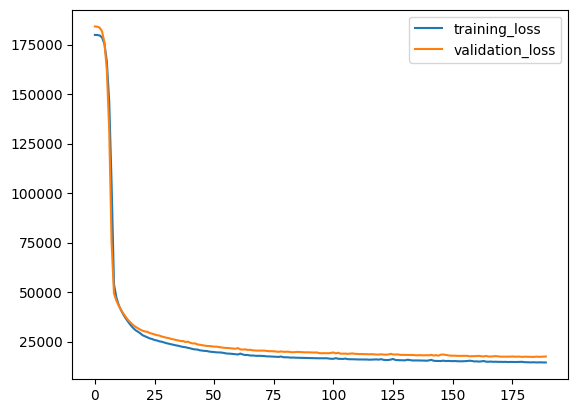

In [11]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

In [12]:
pred = model.predict(x_test)

12/12 [==============================] - 0s 1000us/step


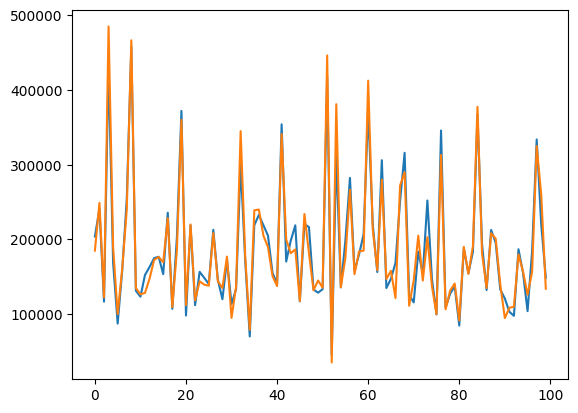

In [13]:
x_test_index = range(len(x_test[0:100]))
plt.plot(x_test_index, pred[0:100], y_test[0:100])

In [14]:
df = pd.read_csv('test.csv')

In [15]:
df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Condition2', 'RoofMatl', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature', 'HouseStyle'], inplace=True)
df = pd.get_dummies(df)

In [16]:
df.fillna(int(df["LotFrontage"].mean()), inplace=True)
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
df.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)
unique_ms_subclass = list(pd.unique(df["MSSubClass"]))
for i in range(len(df)):
    df["MSSubClass"][i] = unique_ms_subclass.index(df["MSSubClass"][i])

C:\Users\arezz\AppData\Local\Temp\ipykernel_23084\780775994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MSSubClass"][i] = unique_ms_subclass.index(df["MSSubClass"][i])


In [ ]:
# test_cols = list(df.columns)
# not_in_test = [i for i in train_cols if i not in test_cols]

: 

In [17]:
ids = df["Id"]
df.drop(columns=["Id"], inplace=True)
df = df.to_numpy()
df_scaled = scaler.fit_transform(df)
predictions = model.predict(df_scaled)

46/46 [==============================] - 0s 1ms/step


In [18]:
submission = pd.DataFrame()
submission["Id"] = ids
submission["SalePrice"] = predictions.flatten()
print(submission.head(10))

     Id      SalePrice
0  1461  121746.648438
1  1462  162943.234375
2  1463  176197.687500
3  1464  180009.406250
4  1465  190759.515625
5  1466  167938.093750
6  1467  162571.359375
7  1468  161623.765625
8  1469  180429.125000
9  1470  121024.640625


In [19]:
submission.to_csv('house_price_submission_nn.csv', index=False)